In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [9]:
credito = pd.read_csv('Dados/Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [10]:
# Removendo a coluna Classe
previsores = credito.iloc[:,0:20].values
previsores[0]

array(['<0', 6, "'critical/other existing credit'", 'radio/tv', 1169,
       "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
       "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes', 'yes'],
      dtype=object)

In [11]:
# Isolando a coluna Classe
classe = credito.iloc[:,20].values
classe[0]

'good'

In [12]:
# Transformando atributos categóricos em números, pois o GaussianNB não trabalha com atributos categóricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

previsores[0]

array([2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
      dtype=object)

In [13]:
# Bases de treinamento e de teste

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,classe,test_size=0.3, random_state = 0)

In [23]:
# Criação da Árvore de Decisão
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento,y_treinamento)

export_graphviz(arvore, out_file='tree.dot')

In [24]:
# Previsões
previsoes = arvore.predict(x_teste)

In [25]:
# Comparar as previsões com a massa de original
confusao = confusion_matrix(y_teste,previsoes)
confusao

array([[ 42,  44],
       [ 55, 159]])

In [28]:
# Cálculo das taxas de acertos e erros
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

taxa_acerto

0.67

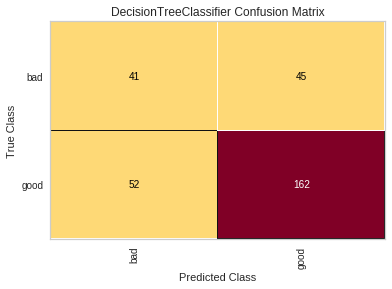

In [32]:
from yellowbrick.classifier import ConfusionMatrix

v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_treinamento,y_treinamento)
v.score(x_teste,y_teste)
v.poof()

In [29]:
# Avaliando novos registros não pertencentes a massa de treinamento/teste

novo_credito = pd.read_csv('Dados/NovoCredit.csv')
novo_credito = novo_credito.iloc[:,0:20].values

In [30]:
novo_credito[:,0] = labelencoder.fit_transform(novo_credito[:,0])
novo_credito[:,2] = labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder.fit_transform(novo_credito[:,19])

novo_credito[0]

array([0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0],
      dtype=object)

In [31]:
# Previsão
arvore.predict(novo_credito)[0]

'good'